In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [8]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE


#condensed nearest neighbours


SyntaxError: invalid syntax (<ipython-input-8-bbd116fc4169>, line 4)

In [ ]:
from collections import Counter
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [9]:
df=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_set.csv')
df_ROS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_ROS.csv')
df_RUS=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_RUS.csv')
df_SMOTE=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\training_SMOTE.csv')
df_test=pd.read_csv(r'C:\Users\Mollie\Documents\Uni 3\AI\AI project\ActualActualData\test_set.csv')
df.head()
x_train=df.iloc[:,:-1]
y_train=df.iloc[:,-1]
x_ov=df_ROS.iloc[:,:-1]
y_ov=df_ROS.iloc[:,-1]
x_under = df_RUS.iloc[:,:-1]
y_under=df_RUS.iloc[:,-1]
x_smote=df_SMOTE.iloc[:,:-1]
y_smote=df_SMOTE.iloc[:,-1]
x_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
accuracy_no_sampling=[]
accuracy_over_sampling=[]
accuracy_under_sampling=[]
accuracy_smote_sampling=[]
f1_no_sampling=[]
f1_over_sampling=[]
f1_under_sampling=[]
f1_smote_sampling=[]
fbeta_no_sampling=[]
fbeta_over_sampling=[]
fbeta_under_sampling=[]
fbeta_smote_sampling=[]

In [284]:
fbeta_no_sampling=[]
f1_no_sampling=[]
fbeta_over_sampling=[]
fbeta_under_sampling=[]
fbeta_smote_sampling=[]

In [13]:
df.shape

(21000, 24)

In [172]:
clf =tree.DecisionTreeClassifier()

In [294]:
from sklearn.ensemble import AdaBoostClassifier
def optimal_est(x_train, y_train, learnrate, x_test):
    accuracy_list1 =[]
    f1_list1=[]
    precision_list1=[]
    recall_list1=[]
    for i in learnrate:
        clf_ada = AdaBoostClassifier(n_estimators=100,learning_rate=i)
        clf_nosamp_ada=clf_ada.fit(x_train,y_train)
        clf_nosamp_prediction_ada=clf_nosamp_ada.predict(x_test)
        clf_nosamp_accuracy_ada=accuracy_score(clf_nosamp_prediction_ada,y_test)
        clf_nosamp_f1_ada=f1_score(clf_nosamp_prediction_ada,y_test)
        clf_nosamp_precision_ada=precision_score(clf_nosamp_prediction_ada,y_test)
        clf_nosamp_recall_ada=recall_score(clf_nosamp_prediction_ada,y_test)
        accuracy_list1.append(clf_nosamp_accuracy_ada)
        f1_list1.append(clf_nosamp_f1_ada)
        precision_list1.append(clf_nosamp_precision_ada)
        recall_list1.append(clf_nosamp_recall_ada)
    plt.plot(learnrate,accuracy_list1)
    plt.plot(learnrate,f1_list1)
    plt.show()
    plt.plot(learnrate,recall_list1)
    plt.show()
    plt.plot(learnrate, precision_list1)
    plt.show()

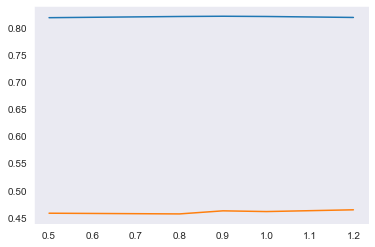

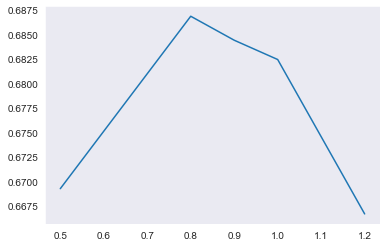

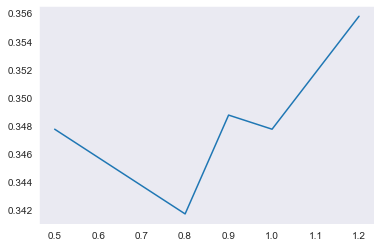

In [295]:
optimal_est(x_train,y_train,[0.5,0.8,0.9,1,1.2],x_test)

In [288]:
#nosampling decsiion tree
clf_nosamp=clf.fit(x_train,y_train)
clf_nosamp_prediction=clf_nosamp.predict(x_test)
clf_nosamp_accuracy=accuracy_score(clf_nosamp_prediction,y_test)
clf_nosamp_f1=f1_score(clf_nosamp_prediction,y_test)
clf_nosamp_fbeta=fbeta_score(clf_nosamp_prediction,y_test,beta=0.2)
clf_nosamp=[clf_nosamp_accuracy,clf_nosamp_f1]
accuracy_no_sampling.append(clf_nosamp_accuracy)
f1_no_sampling.append(clf_nosamp_f1)
fbeta_no_sampling.append(clf_nosamp_fbeta)
f1_no_sampling
clf_nosamp
print(f1_no_sampling, fbeta_no_sampling)

[0.405893536121673, 0.42125237191650855, 0.4157944814462417, 0.41555977229601515] [0.41077922992092725, 0.4237423083209863, 0.41813318390628385, 0.43820224719101125]


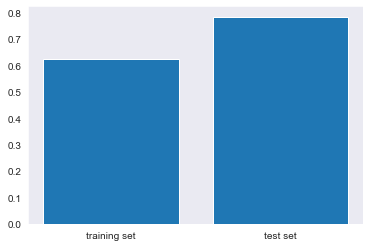

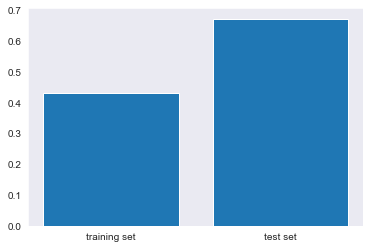

In [343]:
clf =tree.DecisionTreeClassifier(criterion ='gini')
clf_undersamp=clf.fit(x_under,y_under)
clf_undersamp_prediction=clf_undersamp.predict(x_test)
clf_undersamp_prediction1=clf_undersamp.predict(x_train)
clf_undersamp_accuracy=accuracy_score(clf_undersamp_prediction,y_test)
clf_undersamp_accuracy1=accuracy_score(clf_undersamp_prediction1,y_train)
clf_undersamp_f1=f1_score(clf_undersamp_prediction,y_test)
clf_undersamp_f11=f1_score(clf_undersamp_prediction1,y_train)
#clf_undersamp_fbeta=fbeta_score(clf_undersamp_prediction,y_test,beta=0.8)
clf_undersampacc=[clf_undersamp_accuracy,clf_undersamp_accuracy1]
clf_undersampf1=[clf_undersamp_f1,clf_undersamp_f11]
names12clf_undersamp=['training set','test set']
plt.bar(names12clf_undersamp, clf_undersampacc)
plt.show()
plt.bar(names12clf_undersamp, clf_undersampf1)
plt.show()
#my decision tree is massivly underfitting


In [267]:
#nosampling decsiion tree adaboost
ada = AdaBoostClassifier(n_estimators=100,learning_rate=1)
ada_nosamp=ada.fit(x_train,y_train)
ada_nosamp_prediction=ada_nosamp.predict(x_test)
ada_nosamp_accuracy=accuracy_score(ada_nosamp_prediction,y_test)
ada_nosamp_f1=f1_score(ada_nosamp_prediction,y_test)
ada_nosamp=[ada_nosamp_accuracy,ada_nosamp_f1]
accuracy_no_sampling.append(ada_nosamp_accuracy)
f1_no_sampling.append(ada_nosamp_f1)

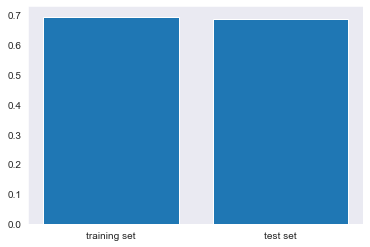

In [314]:
#check the model isnt overfitting
ada = AdaBoostClassifier(n_estimators=100,learning_rate=0.8)
ada_nosamp=ada.fit(x_train,y_train)
ada_nosamp_prediction=ada_nosamp.predict(x_test)
trainingpred=ada_nosamp.predict(x_train)
recall12= recall_score(trainingpred, y_train)
recall123=recall_score(ada_nosamp_prediction,y_test)
recall_scores=[recall12,recall123]
names12=['training set','test set']
plt.bar(names12, recall_scores)
plt.show()


In [279]:
#oversampling
#now we make the decision tree with our new smaples
clf_oversamp=clf.fit(x_ov,y_ov)
clf_oversamp_prediction=clf_oversamp.predict(x_test)
clf_oversamp_accuracy=accuracy_score(clf_oversamp_prediction,y_test)
clf_oversamp_f1=f1_score(clf_oversamp_prediction,y_test)
clf_oversamp_fbeta=fbeta_score(clf_oversamp_prediction,y_test,beta=0.8)
clf_oversamp=[oversamp_accuracy,oversamp_f1]
accuracy_over_sampling.append(clf_oversamp_accuracy)
f1_over_sampling.append(clf_oversamp_f1)
fbeta_over_sampling.append(clf_oversamp_fbeta)

In [255]:
#oversampling ada 
ada_oversamp=ada.fit(x_ov,y_ov)
ada_oversamp_prediction=ada_oversamp.predict(x_test)
ada_oversamp_accuracy=accuracy_score(ada_oversamp_prediction,y_test)
ada_oversamp_f1=f1_score(ada_oversamp_prediction,y_test)
ada_oversamp=[ada_oversamp_accuracy,ada_oversamp_f1]
accuracy_over_sampling.append(ada_oversamp_accuracy)
f1_over_sampling.append(ada_oversamp_f1)

In [280]:
#undersampling
clf_undersamp=clf.fit(x_under,y_under)
clf_undersamp_prediction=clf_undersamp.predict(x_test)
clf_undersamp_accuracy=accuracy_score(clf_undersamp_prediction,y_test)
clf_undersamp_f1=f1_score(clf_undersamp_prediction,y_test)
clf_undersamp_fbeta=fbeta_score(clf_undersamp_prediction,y_test,beta=0.8)
clf_undersamp=[clf_undersamp_accuracy,clf_undersamp_f1]
accuracy_under_sampling.append(clf_undersamp_accuracy)
f1_under_sampling.append(clf_undersamp_f1)
fbeta_under_sampling.append(clf_undersamp_fbeta)

In [257]:
#undersampling ada
ada_undersamp=ada.fit(x_under,y_under)
ada_undersamp_prediction=ada_undersamp.predict(x_test)
ada_undersamp_accuracy=accuracy_score(ada_undersamp_prediction,y_test)
ada_undersamp_f1=f1_score(ada_undersamp_prediction,y_test)
ada_undersamp=[ada_undersamp_accuracy,ada_undersamp_f1]
accuracy_under_sampling.append(ada_undersamp_accuracy)
f1_under_sampling.append(ada_undersamp_f1)

In [281]:
#smote sampling
oversample_smote = SMOTE()
clf_oversamp_smote=clf.fit(x_smote,y_smote)
clf_oversamp_smote_prediction=clf_oversamp_smote.predict(x_test)
clf_oversamp_smote_accuracy=accuracy_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_f1=f1_score(clf_oversamp_smote_prediction,y_test)
clf_oversamp_smote_fbeta=fbeta_score(clf_oversamp_smote_prediction,y_test,beta=0.8)
clf_smote=[oversamp_smote_accuracy,oversamp_smote_f1]
accuracy_smote_sampling.append(clf_oversamp_smote_accuracy)
f1_smote_sampling.append(clf_oversamp_smote_f1)
fbeta_smote_sampling.append(clf_oversamp_smote_fbeta)

In [259]:
#smote sampling ada
oversample_smote = SMOTE()
ada_oversamp_smote=ada.fit(x_smote,y_smote)
ada_oversamp_smote_prediction=ada_oversamp_smote.predict(x_test)
ada_oversamp_smote_accuracy=accuracy_score(ada_oversamp_smote_prediction,y_test)
ada_oversamp_smote_f1=f1_score(ada_oversamp_smote_prediction,y_test)
ada_smote=[ada_oversamp_smote_accuracy,ada_oversamp_smote_f1]
accuracy_smote_sampling.append(ada_oversamp_smote_accuracy)
f1_smote_sampling.append(ada_oversamp_smote_f1)

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

In [128]:
#we first find the optimal number of trees in the random forest (TAKES AGES TO RUN) and from the results choose 100 also not sure why zigzag
def optimal_trees(x_train, y_train, array, x_test):
    accuracy_list =[]
    f1_list=[]
    for i in array:
        rfc =ensemble.RandomForestClassifier(n_estimators=i)
        rfc_nosamp=rfc.fit(x_train,y_train)
        rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
        rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
        rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
        accuracy_list.append(rfc_nosamp_accuracy)
        f1_list.append(rfc_nosamp_f1)
    print(accuracy_list,f1_list)
    plt.plot(array, accuracy_list)
    plt.xlabel('no_of_tres')
    plt.ylabel('score')
    plt.show()
    plt.plot(array, f1_list)
    plt.show()
    return('hi')
 
    

    
    

[0.81, 0.8128888888888889, 0.8193333333333334, 0.816, 0.8191111111111111, 0.8151111111111111, 0.8195555555555556, 0.8215555555555556, 0.8173333333333334, 0.8202222222222222, 0.8175555555555556, 0.8182222222222222, 0.8195555555555556, 0.8182222222222222] [0.46192573945877907, 0.47176913425345046, 0.4811742182514358, 0.4739517153748412, 0.483502538071066, 0.46803069053708446, 0.4873737373737373, 0.49591964846202136, 0.4804045512010114, 0.48569612205975843, 0.48591108328115207, 0.48227848101265824, 0.4873737373737373, 0.48875]


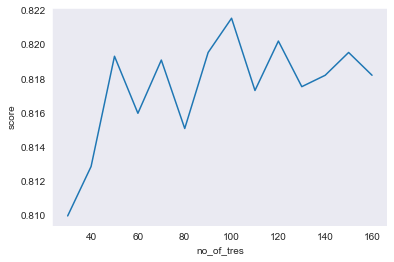

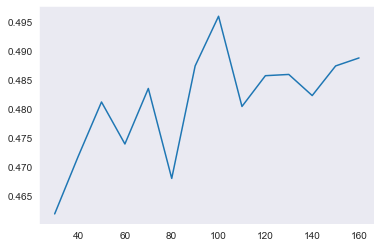

'hi'

In [131]:
optimal_trees(x_train,y_train,[30,40,50,60,70,80,90,100,110,120,130,140,150,160],x_test)

In [ ]:
rfc =ensemble.RandomForestClassifier(n_estimators=100)

In [268]:
#rfc nosampling
rfc_nosamp=rfc.fit(x_train,y_train)
rfc_nosamp_prediction=rfc_nosamp.predict(x_test)
rfc_nosamp_accuracy=accuracy_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_f1=f1_score(rfc_nosamp_prediction,y_test)
rfc_nosamp_scores= [rfc_nosamp_accuracy, rfc_nosamp_f1]
rfc_nosamp=[rfc_nosamp_scores]
accuracy_no_sampling.append(rfc_nosamp_accuracy)
f1_no_sampling.append(rfc_nosamp_f1)

In [261]:
#rfc oversampling
#now we make the decision tree with our new smaples
rfc_oversamp=rfc.fit(x_ov,y_ov)
rfc_oversamp_prediction=rfc_oversamp.predict(x_test)
rfc_oversamp_accuracy=accuracy_score(rfc_oversamp_prediction,y_test)
rfc_oversamp_f1=f1_score(rfc_oversamp_prediction,y_test)
rfc_oversamp=[rfc_oversamp_accuracy,rfc_oversamp_f1]
accuracy_over_sampling.append(rfc_oversamp_accuracy)
f1_over_sampling.append(rfc_oversamp_f1)

In [262]:
#rfc undersampling
#now we make the decision tree with our new smaples
undersamp_rfc=rfc.fit(x_under,y_under)
rfc_undersamp_prediction=undersamp_rfc.predict(x_test)
rfc_undersamp_accuracy=accuracy_score(rfc_undersamp_prediction,y_test)
rfc_undersamp_f1=f1_score(rfc_undersamp_prediction,y_test)
rfc_undersamp=[rfc_undersamp_accuracy, rfc_undersamp_f1]
accuracy_under_sampling.append(rfc_undersamp_accuracy)
f1_under_sampling.append(rfc_undersamp_f1)

In [263]:
oversample_smote = SMOTE()
rfc_oversamp_smote=rfc.fit(x_smote,y_smote)
rfc_oversamp_smote_prediction=rfc_oversamp_smote.predict(x_test)
rfc_oversamp_smote_accuracy=accuracy_score(rfc_oversamp_smote_prediction,y_test)
rfc_oversamp_smote_f1=f1_score(rfc_oversamp_smote_prediction,y_test)
rfc_smote=[rfc_oversamp_smote_accuracy, rfc_oversamp_smote_f1]
accuracy_smote_sampling.append(rfc_oversamp_smote_accuracy)
f1_smote_sampling.append(rfc_oversamp_smote_f1)

In [182]:
accuracy_no_sampling
accuracy_over_sampling
accuracy_under_sampling
accuracy_smote_sampling
f1_no_sampling
f1_over_sampling
f1_under_sampling
f1_smote_sampling

[0.521193092621664]

In [269]:
print(accuracy_no_sampling)
print(accuracy_over_sampling)
print(accuracy_under_sampling)
print(accuracy_smote_sampling)
print(f1_no_sampling)
print(f1_over_sampling)
print(f1_under_sampling)
print(f1_smote_sampling)

[0.7235555555555555, 0.82, 0.8171111111111111]
[0.7293333333333333, 0.7506666666666667, 0.8071111111111111]
[0.6213333333333333, 0.7362222222222222, 0.7344444444444445]
[0.7002222222222222, 0.7626666666666667, 0.7942222222222223]
[0.4126534466477809, 0.4607190412782956, 0.4827152734129478]
[0.4052734375, 0.5344398340248963, 0.5062571103526734]
[0.43275632490013316, 0.5265257279617073, 0.5218087234893958]
[0.4157644001732352, 0.5158658204895739, 0.5126315789473684]


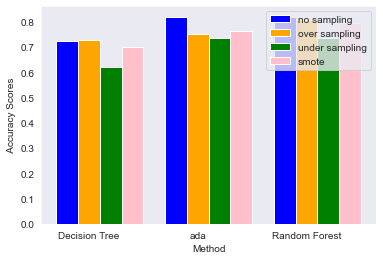

In [271]:
methods=['Decision Tree','ada','Random Forest',]
sampling=['no sampling','over sampling','under sampling','smote']
x=np.arange(3)
width=0.2

plt.bar(x-0.2, accuracy_no_sampling, width,color='blue')
plt.bar(x, accuracy_over_sampling, width,color ='orange')
plt.bar(x+0.2, accuracy_under_sampling,width,color='green')
plt.bar(x+0.4, accuracy_smote_sampling, width,color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' Accuracy Scores')
plt.xlabel('Method')
ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()



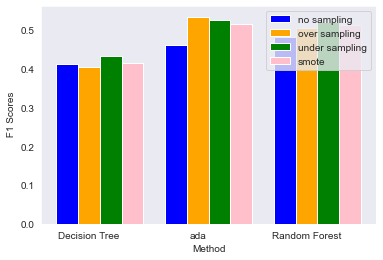

In [272]:
methods=['Decision Tree','ada','Random Forest']
sampling=['no sampling','over sampling','under sampling','smote']
x=np.arange(3)
width=0.2

plt.bar(x-0.2, f1_no_sampling, width,color='blue')
plt.bar(x, f1_over_sampling, width,color ='orange')
plt.bar(x+0.2, f1_under_sampling,width,color='green')
plt.bar(x+0.4, f1_smote_sampling, width,color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' F1 Scores')
plt.xlabel('Method')
ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()

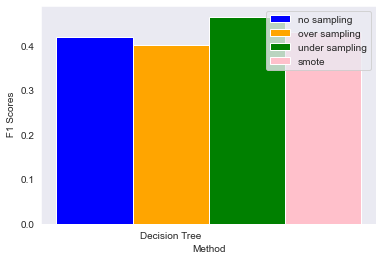

In [282]:
methods=['Decision Tree']
sampling=['no sampling','over sampling','under sampling','smote']
x=np.arange(1)
width=0.2

plt.bar(x-0.2, fbeta_no_sampling, width,color='blue')
plt.bar(x, fbeta_over_sampling, width,color ='orange')
plt.bar(x+0.2, fbeta_under_sampling,width,color='green')
plt.bar(x+0.4, fbeta_smote_sampling, width,color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel(' F1 Scores')
plt.xlabel('Method')
ax.set_title('Scores by method and sampling')
plt.xticks(x,methods)
plt.legend(sampling)

plt.show()